In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

#For displaying all the columns in the data set in the results:
pd.set_option('display.max_columns', None)

## 1. DATA READING AND UNDERSTANDING

In [2]:
#Reading the file
lead =pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Description 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
#Shape
lead.shape

(9240, 37)

In [5]:
#information about the column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. DATA CLEANING

Checking for null values

In [6]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

there are total 17 columns with null value and for sum columns null valued are greater than 1000, so we have to check the percentage of its and then filter the null value with 50%

In [7]:
#Converting into percentage
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#Dropping the columns with more than 50% NA values.
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>50)].columns, 1)
lead.shape

(9240, 36)

removing the rows with the null value will effect a lot of data 
and they are important columns. So,we are going to replace the null values with 'not provided'

In [9]:
#Converting the null value with "not provided"
lead['Specialization'] = lead['Specialization'].fillna('not provided') 
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['Country'] = lead['Country'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

we will remove the null value which containing more than 35% 
and also the respective columns are not containing too much effective data

In [11]:
#Dropping the columns with the highest number of null values
lead = lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','How did you hear about X Education','City'],axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [12]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [13]:
#Eliminating the null values
lead['TotalVisits']=lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())
lead['Lead Source']=lead['Lead Source'].fillna('Google')
lead['Last Activity']=lead['Last Activity'].fillna('Email Opened')

In [14]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

hence zero null values are observed

### 3. EDA

Checking the all columns against categorical value or continuous value

In [15]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

 Checking the convertion rate

In [16]:
#percentage of converted
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

Text(0.5, 1.0, 'lead')

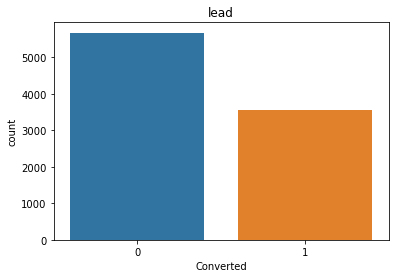

In [17]:
#Plot of the converted leads
sns.countplot(lead['Converted'])
plt.title('lead')

as per the above curve we concluded that we have higher number of people who are not convereted till now

Plotting all the categorical variables

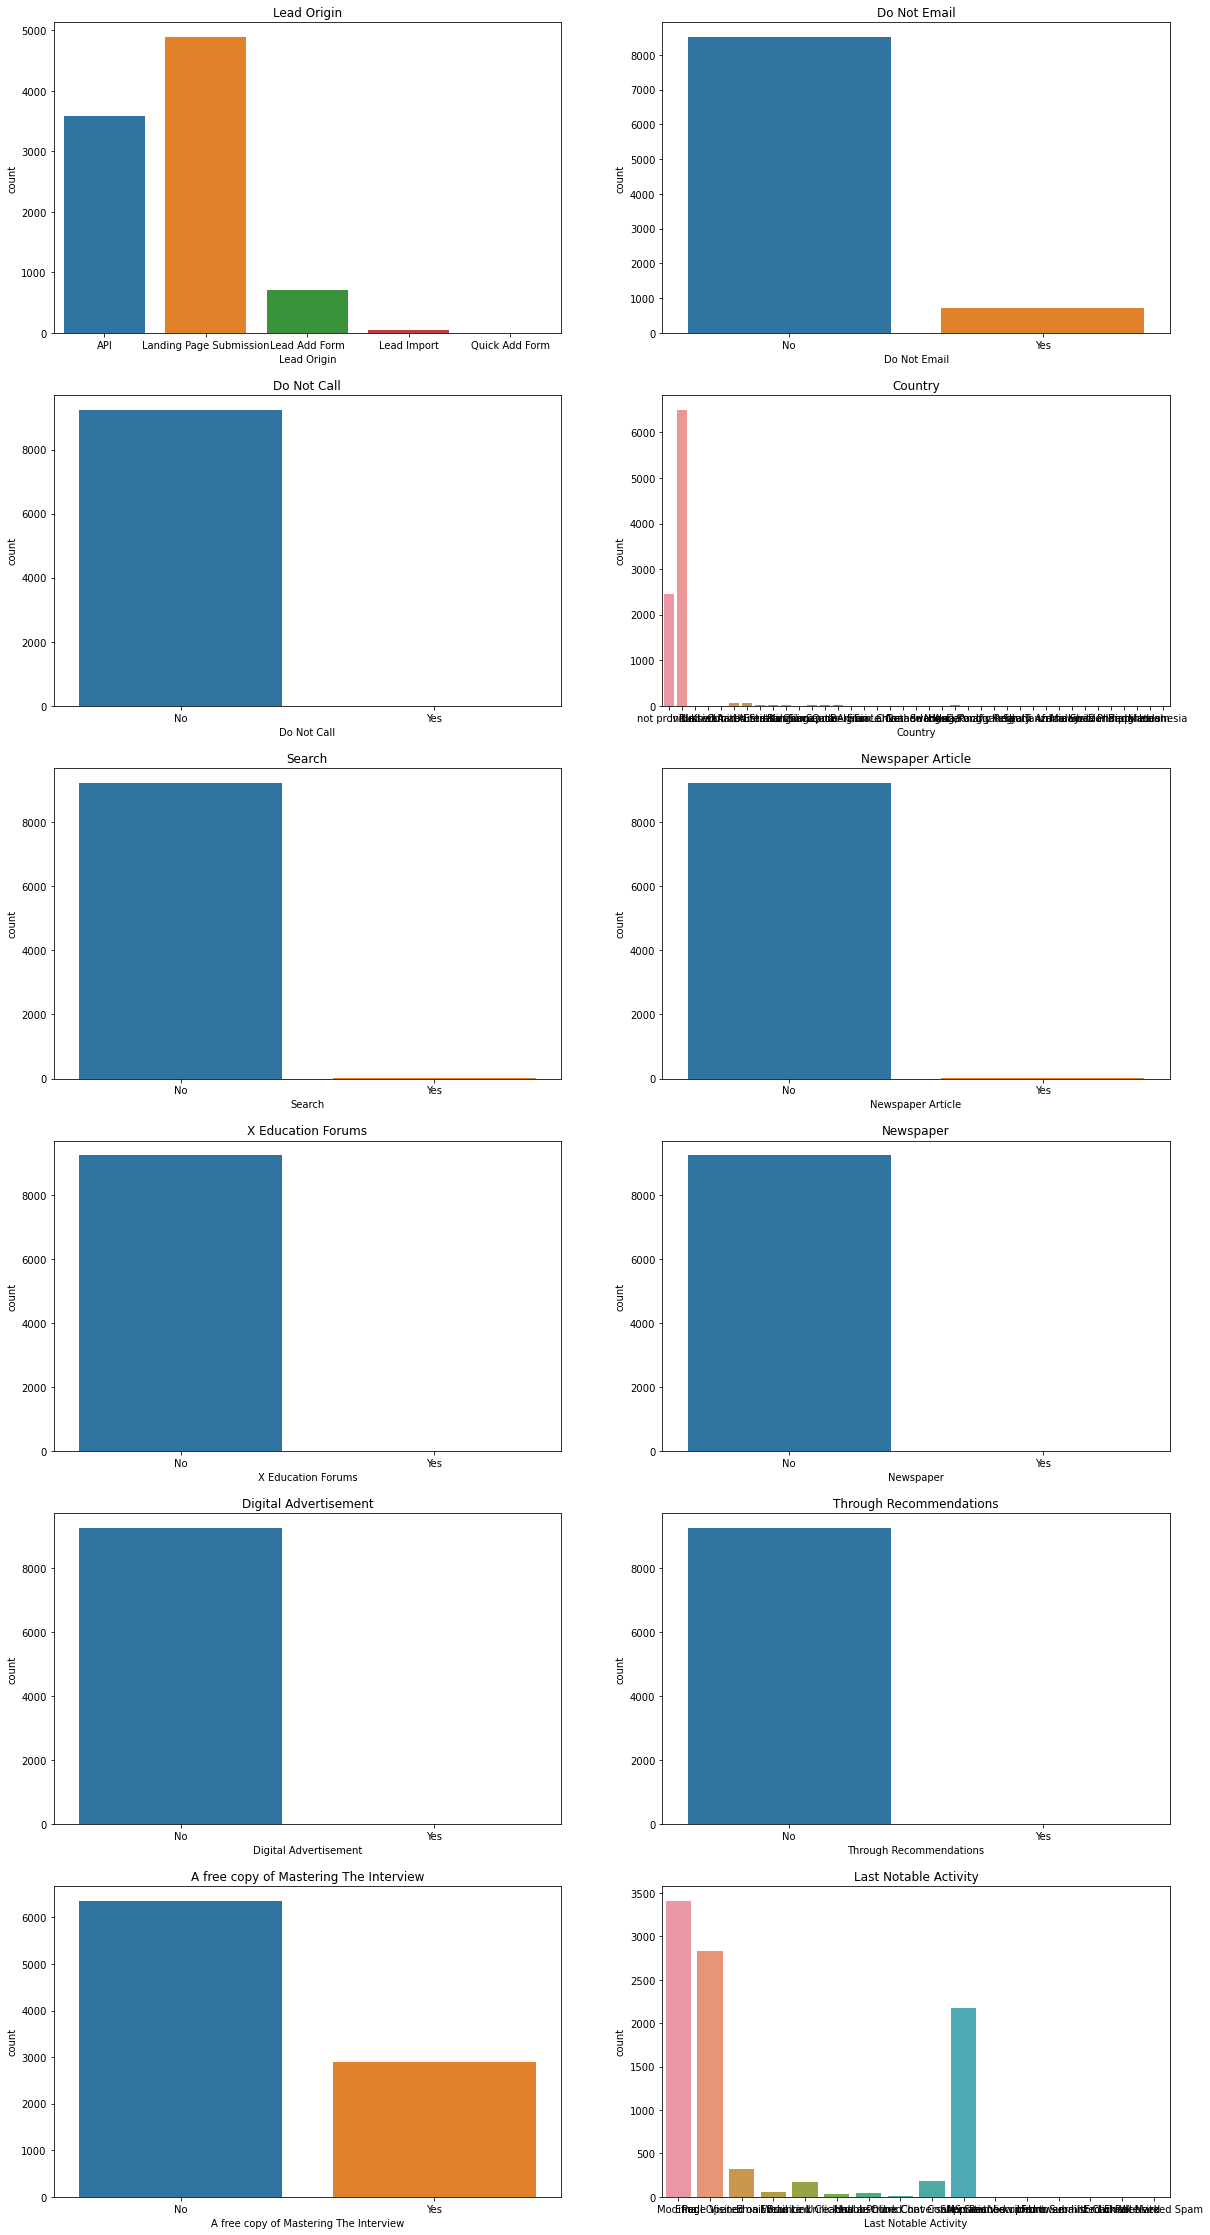

In [18]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead['Last Notable Activity'])
plt.title('Last Notable Activity')

plt.show()

•	Leads are origin mainly from the landing page and from India.
•	The people are generally selected the option ‘don not sent mail’ and ‘don’t call’ which is countereffect the leads generation.
•	There are many columns which are highly skewed such as ‘newspaper article’, ‘X education forms’ etc.
•	Modified are observing most in the last notable activity


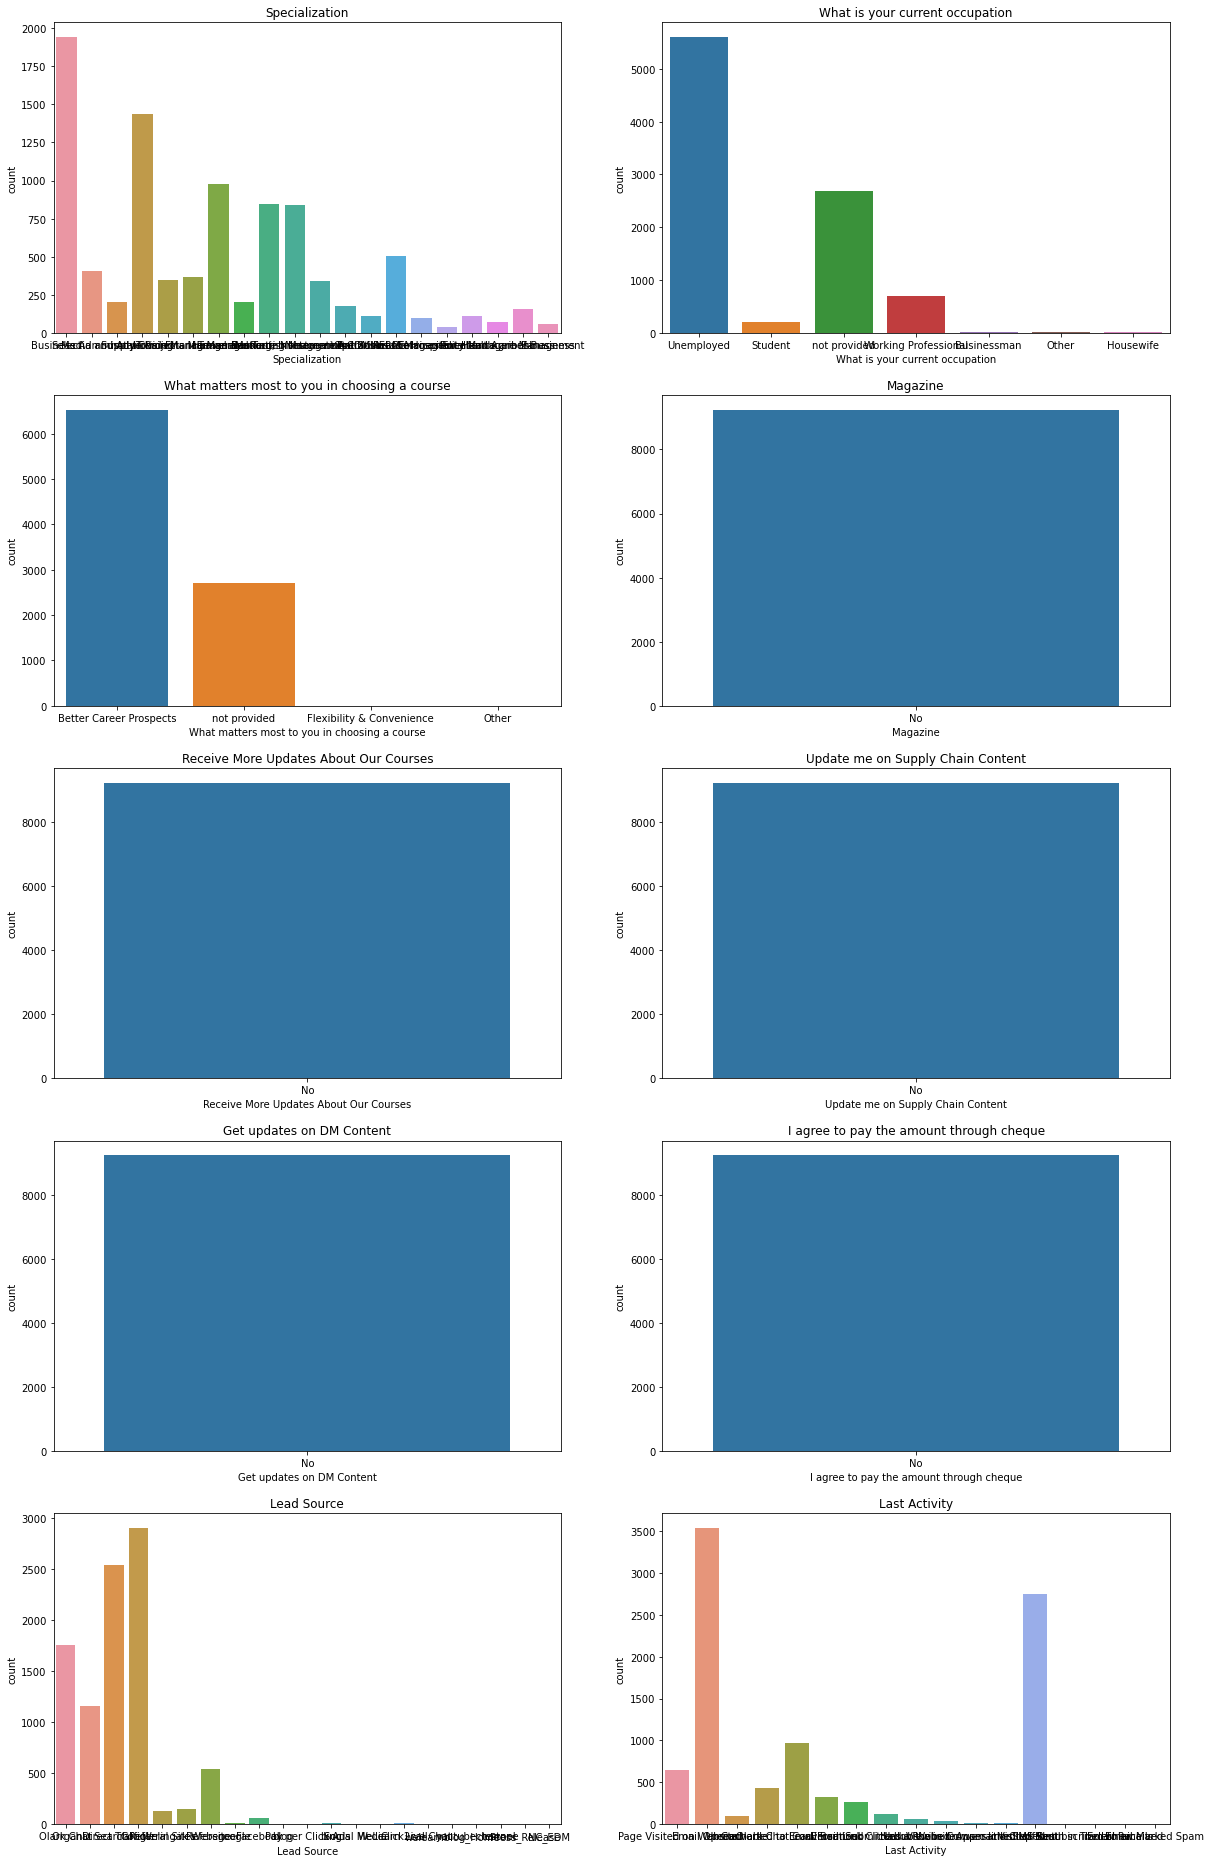

In [19]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Specialization'])
plt.title('Specialization')

plt.subplot(6,2,2)
sns.countplot(lead['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,3)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')

plt.subplot(6,2,4)
sns.countplot(lead['Magazine'])
plt.title('Magazine')

plt.subplot(6,2,5)
sns.countplot(lead['Receive More Updates About Our Courses'])
plt.title('Receive More Updates About Our Courses')

plt.subplot(6,2,6)
sns.countplot(lead['Update me on Supply Chain Content'])
plt.title('Update me on Supply Chain Content')

plt.subplot(6,2,7)
sns.countplot(lead['Get updates on DM Content'])
plt.title('Get updates on DM Content')

plt.subplot(6,2,8)
sns.countplot(lead['I agree to pay the amount through cheque'])
plt.title('I agree to pay the amount through cheque')

plt.subplot(6,2,9)
sns.countplot(lead['Lead Source'])
plt.title('Lead Source')

plt.subplot(6,2,10)
sns.countplot(lead['Last Activity'])
plt.title('Last Activity')


plt.show()

•	Most the people are unemployed and visited this course for better career prospective  and searching it in the google, direct traffic and select the specialization with ‘select’ and not provided.
•	Some of the columns have only one sided date such as ‘magazine’, ‘Receive More Updates About Our Courses’ etc


Checking all the categorical variable against the target variable

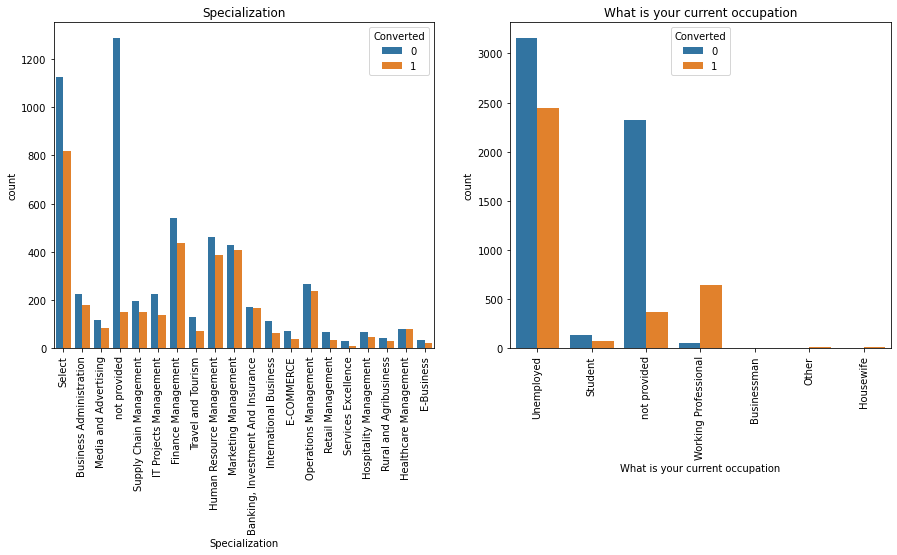

In [20]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Specialization", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x = "What is your current occupation",hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

•	the leads are higher in specialization of marketing, finance, operations, business administration.
•	mostly the working profession and unemployed are interested in the courses


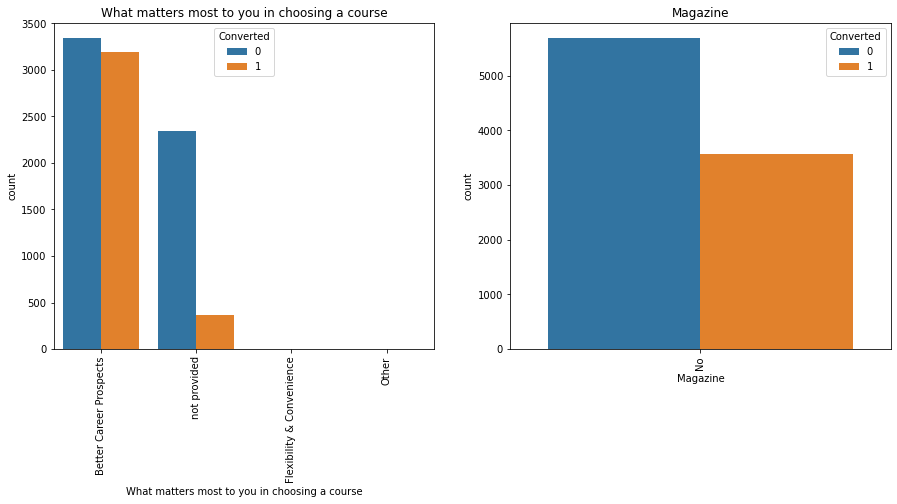

In [21]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x = "Magazine", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Magazine')

plt.show()


for better career prospects are interested in the courses

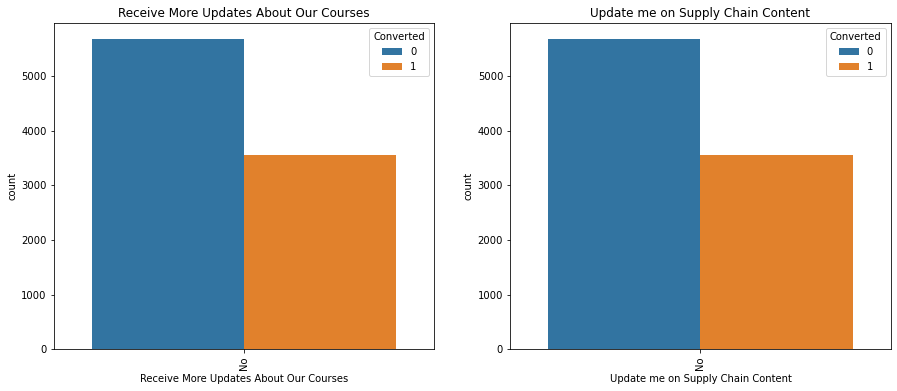

In [22]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Receive More Updates About Our Courses')

plt.subplot(1,2,2)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Update me on Supply Chain Content')

plt.show()


most of the people are not interested for more updated and update on supply chain content

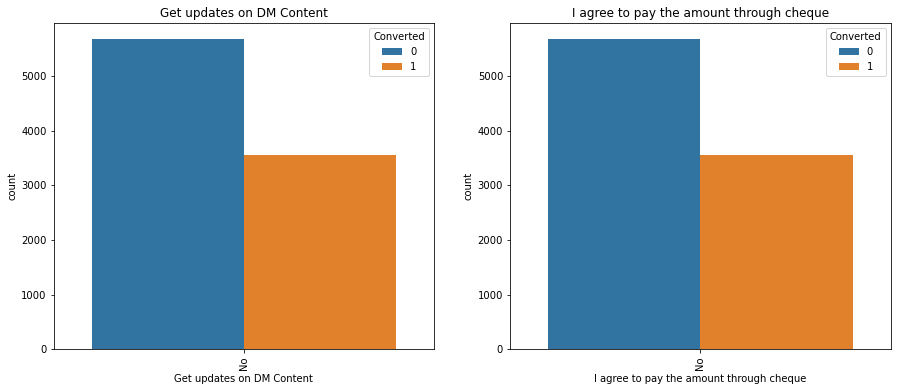

In [23]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')

plt.subplot(1,2,2)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('I agree to pay the amount through cheque')

plt.show()

there is less leads coming when they ask to pay through cheque

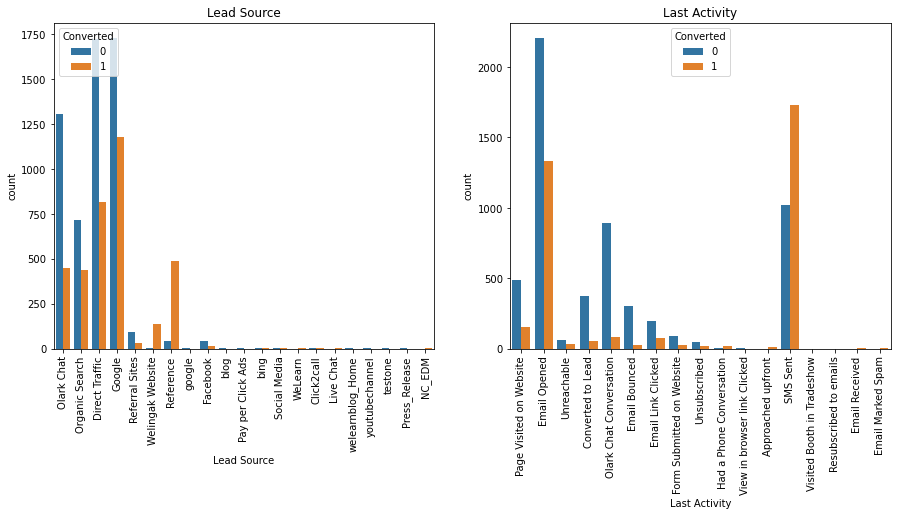

In [24]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Lead Source", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(1,2,2)
sns.countplot(x = "Last Activity", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

in Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category
In Last Activity the number of Hot leads is higher in SMS and in EMAIL opened.

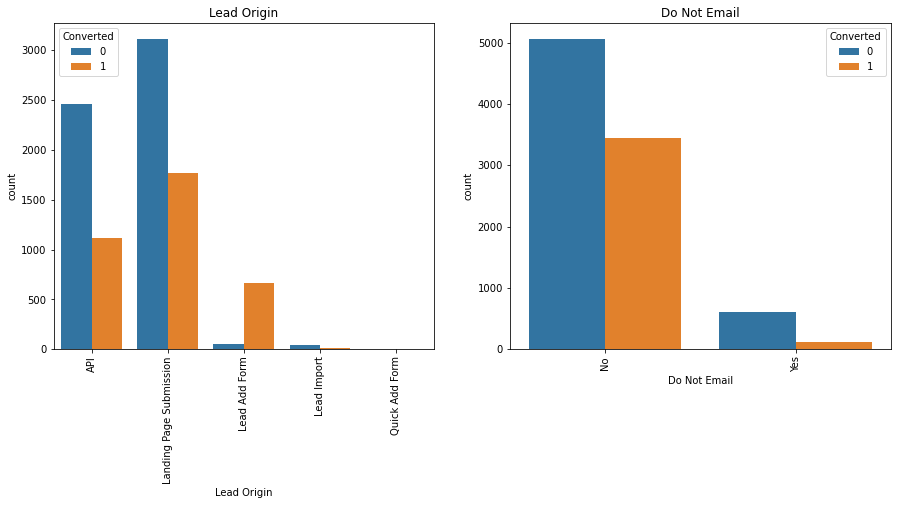

In [25]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.show()

most of the leads coming at landing page submission, API and lead add form.
leads are less when they asked to sent email.

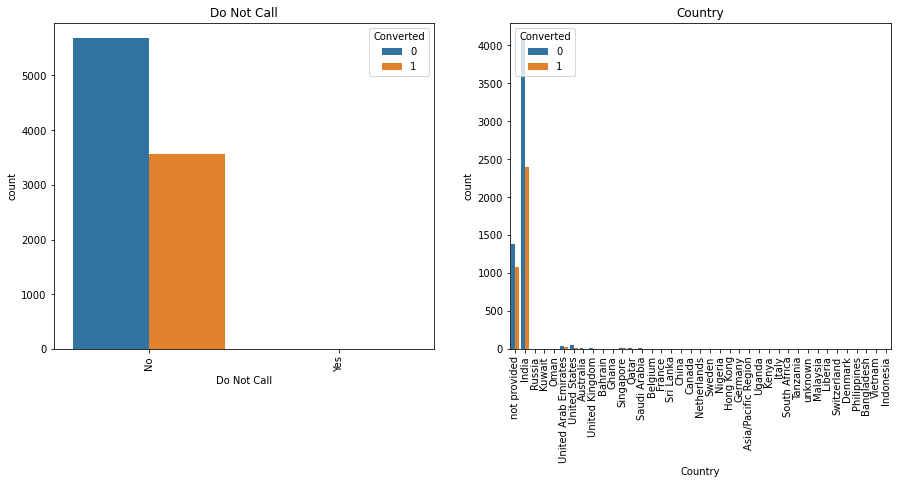

In [26]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(1,2,2)
sns.countplot(x = "Country", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

less leads are coming when they asked to call and leads are coming from India

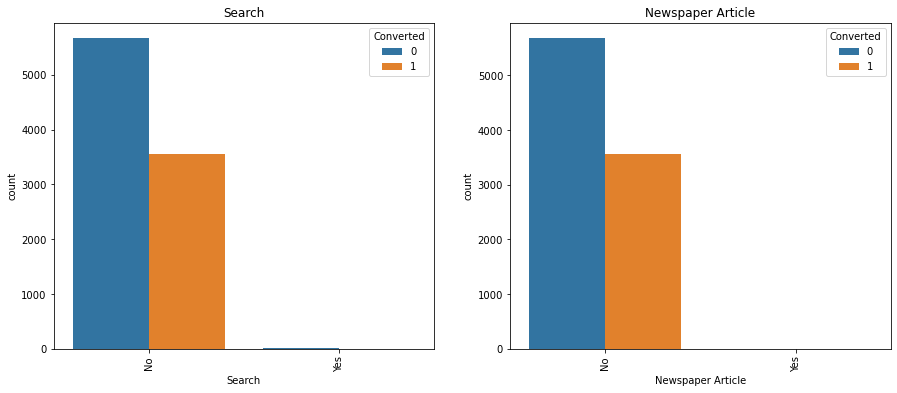

In [27]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Search", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(1,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.show()

there are no leads coming from search and newspaper article

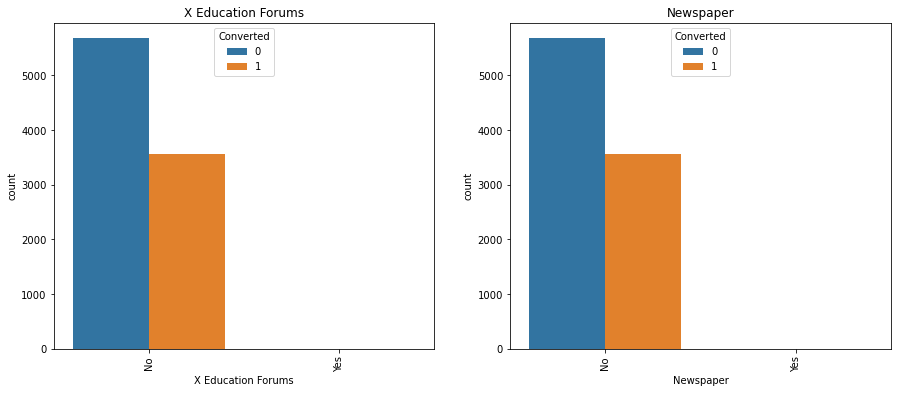

In [28]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x = "Newspaper", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.show()

there are no leads coming from X Education Forums and newspaper

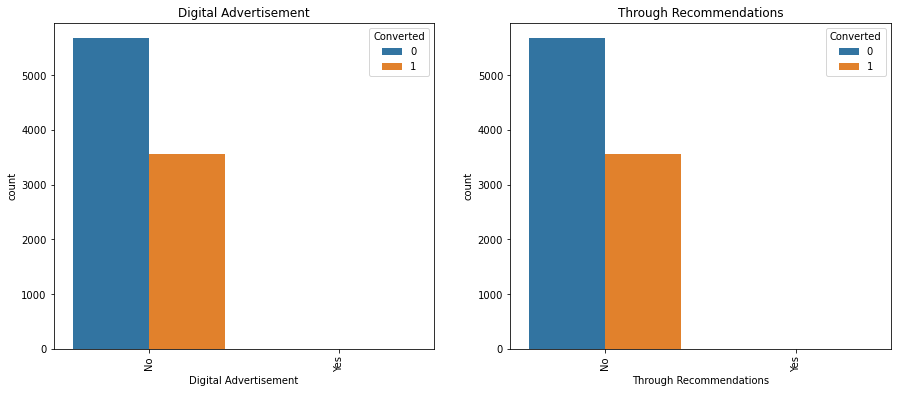

In [29]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(1,2,2)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.show()


there are no leads coming from Through Recommendations and Digital Advertisement

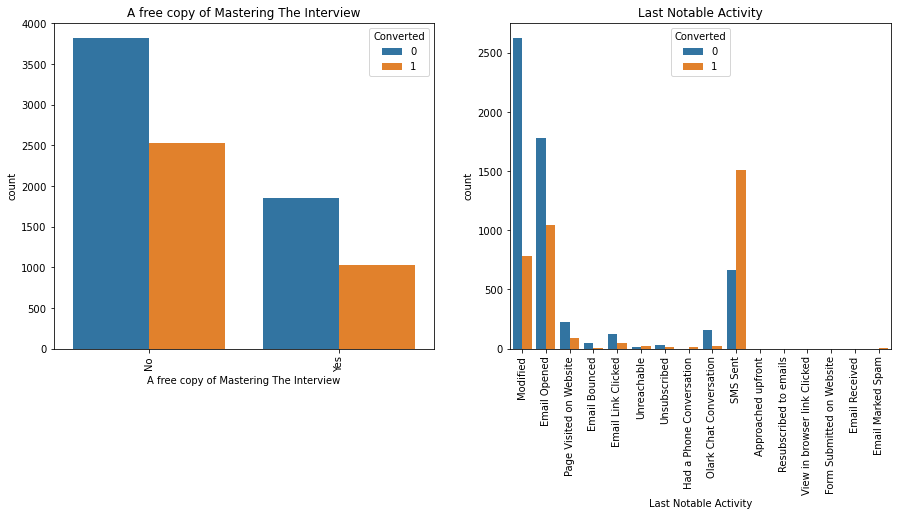

In [30]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In Last notable activity the number of leads is higher in SMS and in EMAIL.

Checking all the Numerical Variables


-- Lead Number
-- TotalVisits
-- Total Time Spent on Website
-- Page Views Per Visit

# Outlier analysis. 

Text(0.5, 1.0, 'Total Visits')

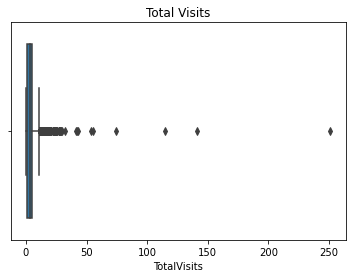

In [31]:
sns.boxplot(lead['TotalVisits'])
plt.title('Total Visits')

outlier are present

Text(0.5, 1.0, 'Page Views Per Visit')

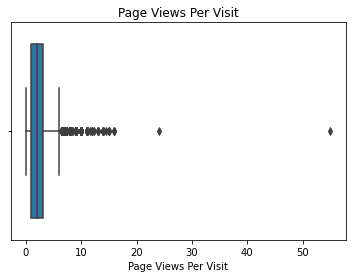

In [32]:
sns.boxplot(lead['Page Views Per Visit'])
plt.title('Page Views Per Visit')

outlier are present

Text(0.5, 1.0, 'Lead Number')

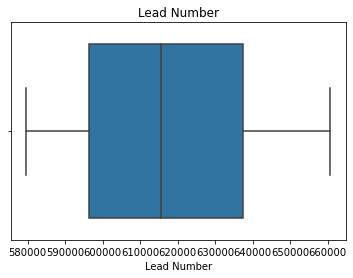

In [33]:
sns.boxplot(lead['Lead Number'])
plt.title('Lead Number')

outlier are not present

Text(0.5, 1.0, 'Total Time Spent on Website')

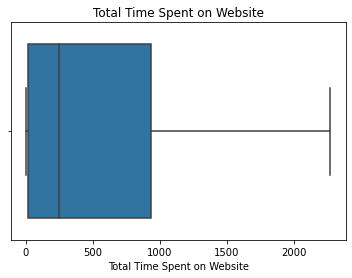

In [34]:
sns.boxplot(lead['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

outlier are present and value spreaded above median

All continuous variables against lead

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

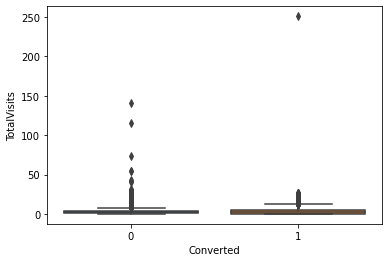

In [35]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

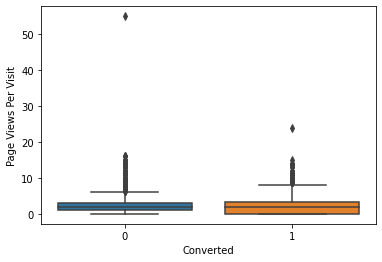

In [36]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

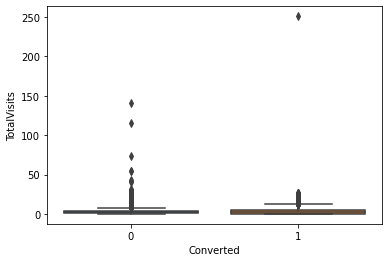

In [37]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

the analysis same for above urinative analysis

LOOKING AT THE CORRELATION BETWEEN ALL THE CONTINUOUS NUMERIC VARIABLES

In [38]:
#Looking at the correlation between the continuous numeric variables in the data
correlation_continuous_numerical = lead[['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()
correlation_continuous_numerical

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.021366,0.020329,0.057042
Converted,0.025157,1.000000,0.029119,0.362483,-0.005068
TotalVisits,0.021366,0.029119,1.000000,0.217341,0.512214
Total Time Spent on Website,0.020329,0.362483,0.217341,1.000000,0.314266
Page Views Per Visit,0.057042,-0.005068,0.512214,0.314266,1.000000


The correlation between Total Visits and Page Views Per Visit is the highest. There is a positive correlation between all the variables expect between Page Views Per Visit and Converted which has a negative correlation. A positive correlation implies that as the value of one variable increases, the value of the other variable also increases. A negative correlation implies that when the value of one of these variables increases, the value of the other variable decreases. 

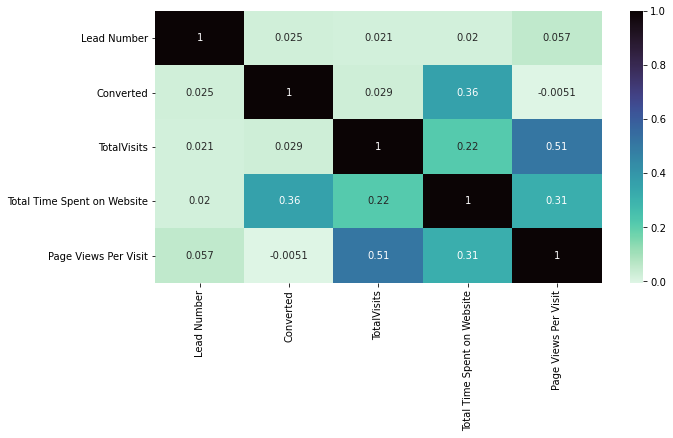

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_continuous_numerical, cmap='mako_r', annot= True)
plt.show()

In [40]:
#Dropping columns that are of no use for analysis. 
lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Do Not Call', 'Update me on Supply Chain Content','Get updates on DM Content','Newspaper Article','X Education Forums','Newspaper','I agree to pay the amount through cheque','Digital Advertisement', 'Through Recommendations','Search','Prospect ID','Country'], axis=1)

# 4. CREATING DUMMY VARIABLES

In [41]:
#To get columns that are of the data type- OBJECT
variable_list=lead.loc[:,lead.dtypes == 'object']
variable_list.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
#Creating Dummy variables
dummy_creation=pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [43]:
#Adding dummies created to the dataset
lead=pd.concat([lead,dummy_creation], axis=1)

In [44]:
#Dropping varibales for which the dummy varaiables were created
lead=lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
lead.shape

(9240, 90)

# 5. TEST TRAIN SPLIT

In [46]:
#Assigning all predictor variables to 'X'
X=lead.drop(['Converted'], 1)
#Assigning the target varibale to 'y'
y=lead['Converted']

In [47]:
#Splitting the dataset into train and test set for linear regression.
#70% of the data will be used as train set and 30% of the data will be used as the test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# 6.  RESCALING / STANDARDISATION

In [48]:
X_train.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0

The minimum and the maximum values of all the categorical and discrete numerical variables are between 0 and 1 implying that they are all on the same scale however in case of the continuous numerical variables, the minimum and maximum values are not between 0 and 1 this could have an impact on the coefficient values of these variables hence standardisation is necessary in this case.

In [49]:
#Scalling the variables 
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head(100)

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,641410,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,..

# 7. BUILDING THE MODEL

# A Model with all variables
# Model 1

In [50]:
#Running a model with all variables
logistic_model_1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6383
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Jan 2022   Deviance:                   1.3742e+05
Time:                        18:09:01   Pearson chi2:                 6.72e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.935e+15    5.7e+07   8.65e+07      0.000    4.93e+15    4.93e+15
Lead Number                                                              3.534e+09     38.396    9.2e+07      0.000    3.53e+09    3.53e+09
TotalVisits                                                              4.522e+15   4.74e+07   9.54e+07      0.000    4.52e+15    4.52e+15
Total Time Spent on Website                                              1.181e+14   3.97e+06   2.98e+07      0.000    1.18e+14    1.18e+14
Page Views Per Visit                                                    -4.624e+14   3.05e+07  -1.52e+07      0.000   -4.62e+14   -4.62e+14
Lead Origin_Landing Page Submission                                     -2.976e+14   3.42e+06   -8.7e+07      0.000   -2.98e+14   -2.98e+14
Lead Origin_Lead Add Form                                               -1.342e+13    1.3e+07  -1.03e+06      0.000   -1.34e+13   -1.34e+13
Lead Origin_Lead Import                                                  2.494e+14    4.8e+07   5.19e+06      0.000    2.49e+14    2.49e+14
Lead Origin_Quick Add Form                                               5.304e+15   6.78e+07   7.82e+07      0.000     5.3e+15     5.3e+15
Lead Source_Direct Traffic                                              -1.847e+15   4.11e+07   -4.5e+07      0.000   -1.85e+15   -1.85e+15
Lead Source_Facebook                                                    -2.523e+15   6.31e+07     -4e+07      0.000   -2.52e+15   -2.52e+15
Lead Source_Google                                                      -1.807e+15   4.09e+07  -4.41e+07      0.000   -1.81e+15   -1.81e+15
Lead Source_Live Chat                                                    1.802e+15   6.14e+07   2.93e+07      0.000     1.8e+15     1.8e+15
Lead Source_NC_EDM                                                        3.55e+15   7.87e+07   4.51e+07      0.000    3.55e+15    3.55e+15
Lead Source_Olark Chat                                                  -1.122e+15   4.11e+07  -2.73e+07      0.000   -1.12e+15   -1.12e+15
Lead Source_Organic Search                                              -1.844e+15   4.11e+07  -4.49e+07      0.000   -1.84e+15   -1.84e+15
Lead Source_Pay per Click Ads                                           -5.823e+15   7.87e+07   -7.4e+07      0.000   -5.82e+15   -5.82e+15
Lead Source_Press_Release                                               -4.672e+15   6.32e+07  -7.39e+07      0.000   -4.67e+15   -4.67e+15
Lead Source_Reference                                                   -1.011e+15    3.9e+07  -2.59e+07      0.000   -1.01e+15   -1.01e+15
Lea

In [51]:
logistic_reg=LogisticRegression()

In [52]:
#Running RFE with 15 variables
rfe=RFE(logistic_reg,15)
rfe = rfe.fit(X_train, y_train)

In [53]:
#Variables that have been selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 62),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Origin_Quick Add Form', False, 55),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 59),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 67),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 73),
 ('Lead Source_WeLearn', False, 54),
 ('Lead Source_Welingak Website', False, 10),
 ('Lead Source_bing', False, 71),
 ('Lead Source_blog', False, 69),
 ('Lead Source_google', False, 49),
 ('Lead Sourc

In [54]:
#Variables that are not included in the model
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
  

In [55]:
#Putting the variables into 'cols'
cols= X_train.columns[rfe.support_]
X_train1=X_train[cols]

# Rebuilding the Model: 
# Model 2

In [56]:
#Re-running the model
X_train_sm=sm.add_constant(X_train1)
logistic_model_2=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.4
Date:                Mon, 03 Jan 2022   Deviance:                       5244.8
Time:                        18:09:03   Pearson chi2:                 6.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -8.3899      0.995     -8.429      0.000     -10.341      -6.439
Lead Number                                                 1.079e-05   1.57e-06      6.855      0.000    7.71e-06    1.39e-05
Total Time Spent on Website                                    4.4789      0.164     27.284      0.000       4.157       4.801
Lead Origin_Landing Page Submission                           -0.2830      0.102     -2.763      0.006      -0.484      -0.082
Lead Origin_Lead Add Form                                      3.6794      0.367     10.038      0.000       2.961       4.398
Lead Source_Direct Traffic                                    -0.2700      0.090     -3.007      0.003      -0.446      -0.094
Lead Source_Olark Chat                                         1.1358      0.123      9.210      0.000       0.894       1.377
Lead Source_Reference                                         -0.4236      0.404     -1.048      0.295      -1.216       0.369
Last Activity_Olark Chat Conversation                         -0.7943      0.176     -4.524      0.000      -1.138      -0.450
Last Activity_SMS Sent                                         1.0062      0.157      6.416      0.000       0.699       1.314
Specialization_not provided                                   -0.5280      0.170     -3.103      0.002      -0.861      -0.194
What is your current occupation_Working Professional           2.6387      0.193     13.676      0.000       2.261       3.017
What is your current occupation_not provided                  20.1627   1.17e+04      0.002      0.999   -2.28e+04    2.29e+04
What matters most to you in choosing a course_not provided   -21.0337   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Last Notable Activity_Modified                                -0.8156      0.095     -8.544      0.000      -1.003      -0.629
Last Notable Activity_SMS Sent                                 0.3467      0.178      1.947      0.052      -0.002       0.696
==============================================================================================================================
"""

In [57]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What matters most to you in choosing a course_...,154.56
11,What is your current occupation_not provided,149.81
0,Lead Number,8.79
14,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.11
2,Lead Origin_Landing Page Submission,5.02
3,Lead Origin_Lead Add Form,4.73
6,Lead Source_Reference,4.25
9,Specialization_not provided,3.14
13,Last Notable Activity_Modified,2.40


The variable - What matters most to you in a course_not provided has a p-value greater than 0.05 and had a VIF value that is greater than 5 . Hence we can drop that variable

In [58]:
#Dropping What matters most to you in choosing a course_not provided
X_train1.drop('What matters most to you in choosing a course_not provided', axis = 1, inplace = True)

# Model-3

In [59]:
#Re-running the model
X_train_sm=sm.add_constant(X_train1)
logistic_model_3=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.9
Date:                Mon, 03 Jan 2022   Deviance:                       5249.8
Time:                        18:09:03   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.3634      0.995     -8.404      0.000     -10.314      -6.413
Lead Number                                           1.076e-05   1.57e-06      6.835      0.000    7.67e-06    1.38e-05
Total Time Spent on Website                              4.4827      0.164     27.322      0.000       4.161       4.804
Lead Origin_Landing Page Submission                     -0.2946      0.102     -2.882      0.004      -0.495      -0.094
Lead Origin_Lead Add Form                                3.6739      0.367     10.023      0.000       2.955       4.392
Lead Source_Direct Traffic                              -0.2768      0.090     -3.087      0.002      -0.453      -0.101
Lead Source_Olark Chat                                   1.1370      0.123      9.213      0.000       0.895       1.379
Lead Source_Reference                                   -0.4216      0.404     -1.043      0.297      -1.214       0.371
Last Activity_Olark Chat Conversation                   -0.7887      0.176     -4.491      0.000      -1.133      -0.445
Last Activity_SMS Sent                                   1.0092      0.157      6.440      0.000       0.702       1.316
Specialization_not provided                             -0.5822      0.167     -3.478      0.001      -0.910      -0.254
What is your current occupation_Working Professional     2.6102      0.190     13.741      0.000       2.238       2.983
What is your current occupation_not provided            -0.8464      0.113     -7.502      0.000      -1.068      -0.625
Last Notable Activity_Modified                          -0.8201      0.095     -8.603      0.000      -1.007      -0.633
Last Notable Activity_SMS Sent                           0.3466      0.178      1.947      0.052      -0.002       0.696
========================================================================================================================
"""

In [60]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,8.78
13,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.11
2,Lead Origin_Landing Page Submission,4.98
3,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.25
9,Specialization_not provided,3.01
11,What is your current occupation_not provided,2.86
12,Last Notable Activity_Modified,2.39
5,Lead Source_Olark Chat,2.32


The variable Lead Number can be dropped due to high VIF value i.e. the VIF value is greater than 5

In [61]:
#Dropping the variable Lead Number
X_train1.drop('Lead Number', axis = 1, inplace = True)

# Model- 4

In [62]:
#Re-running the model
X_train_sm=sm.add_constant(X_train1)
logistic_model_4=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.5
Date:                Mon, 03 Jan 2022   Deviance:                       5297.1
Time:                        18:09:03   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6168      0.102    -15.826      0.000      -1.817      -1.417
Total Time Spent on Website                              4.4855      0.163     27.446      0.000       4.165       4.806
Lead Origin_Landing Page Submission                     -0.3540      0.102     -3.482      0.000      -0.553      -0.155
Lead Origin_Lead Add Form                                3.6341      0.365      9.968      0.000       2.920       4.349
Lead Source_Direct Traffic                              -0.3489      0.089     -3.937      0.000      -0.523      -0.175
Lead Source_Olark Chat                                   1.0227      0.121      8.417      0.000       0.785       1.261
Lead Source_Reference                                   -0.4273      0.402     -1.063      0.288      -1.215       0.361
Last Activity_Olark Chat Conversation                   -0.7987      0.175     -4.573      0.000      -1.141      -0.456
Last Activity_SMS Sent                                   0.9927      0.156      6.374      0.000       0.687       1.298
Specialization_not provided                             -0.6450      0.167     -3.860      0.000      -0.973      -0.318
What is your current occupation_Working Professional     2.5834      0.188     13.712      0.000       2.214       2.953
What is your current occupation_not provided            -0.8029      0.113     -7.134      0.000      -1.023      -0.582
Last Notable Activity_Modified                          -0.8060      0.095     -8.500      0.000      -0.992      -0.620
Last Notable Activity_SMS Sent                           0.2337      0.176      1.327      0.185      -0.112       0.579
========================================================================================================================
"""

In [63]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.27
7,Last Activity_SMS Sent,6.11
2,Lead Origin_Lead Add Form,4.33
5,Lead Source_Reference,4.25
1,Lead Origin_Landing Page Submission,3.26
8,Specialization_not provided,2.90
10,What is your current occupation_not provided,2.83
11,Last Notable Activity_Modified,2.14
3,Lead Source_Direct Traffic,1.90
0,Total Time Spent on Website,1.84


The variable Last Notable Activity_SMS Sent can be dropped due to high VIF value i.e. the VIF value is greater than 5

In [64]:
#Dropping Last Notable Activity_SMS Sent
X_train1.drop('Last Notable Activity_SMS Sent', axis = 1, inplace = True)

# Model- 5

In [65]:
#Re-running the model
X_train_sm=sm.add_constant(X_train1)
logistic_model_5=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.4
Date:                Mon, 03 Jan 2022   Deviance:                       5298.8
Time:                        18:09:03   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5951      0.101    -15.832      0.000      -1.793      -1.398
Total Time Spent on Website                              4.4848      0.163     27.444      0.000       4.164       4.805
Lead Origin_Landing Page Submission                     -0.3530      0.102     -3.473      0.001      -0.552      -0.154
Lead Origin_Lead Add Form                                3.6272      0.365      9.950      0.000       2.913       4.342
Lead Source_Direct Traffic                              -0.3479      0.089     -3.928      0.000      -0.521      -0.174
Lead Source_Olark Chat                                   1.0217      0.121      8.412      0.000       0.784       1.260
Lead Source_Reference                                   -0.4231      0.402     -1.052      0.293      -1.211       0.365
Last Activity_Olark Chat Conversation                   -0.7679      0.173     -4.431      0.000      -1.108      -0.428
Last Activity_SMS Sent                                   1.1743      0.074     15.842      0.000       1.029       1.320
Specialization_not provided                             -0.6384      0.167     -3.824      0.000      -0.966      -0.311
What is your current occupation_Working Professional     2.5886      0.189     13.726      0.000       2.219       2.958
What is your current occupation_not provided            -0.8193      0.112     -7.327      0.000      -1.038      -0.600
Last Notable Activity_Modified                          -0.8735      0.081    -10.851      0.000      -1.031      -0.716
========================================================================================================================
"""

In [66]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,4.31
5,Lead Source_Reference,4.25
1,Lead Origin_Landing Page Submission,3.21
8,Specialization_not provided,2.88
10,What is your current occupation_not provided,2.80
3,Lead Source_Direct Traffic,1.90
0,Total Time Spent on Website,1.82
4,Lead Source_Olark Chat,1.69
11,Last Notable Activity_Modified,1.68
6,Last Activity_Olark Chat Conversation,1.58


The VIF value of all variables are less than 5 but the p-value of Lead Source_Reference is greater than 0.05. This implies that the variable is insignificant hence it can be dropped. 

In [67]:
#Dropping the variable Lead Source_Reference
X_train1.drop('Lead Source_Reference', axis = 1, inplace = True)

# Model- 6

In [68]:
#Re-running the model
X_train_sm=sm.add_constant(X_train1)
logistic_model_6=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.0
Date:                Mon, 03 Jan 2022   Deviance:                       5300.0
Time:                        18:09:04   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5956      0.101    -15.836      0.000      -1.793      -1.398
Total Time Spent on Website                              4.4854      0.163     27.442      0.000       4.165       4.806
Lead Origin_Landing Page Submission                     -0.3531      0.102     -3.474      0.001      -0.552      -0.154
Lead Origin_Lead Add Form                                3.3142      0.192     17.263      0.000       2.938       3.690
Lead Source_Direct Traffic                              -0.3479      0.089     -3.928      0.000      -0.521      -0.174
Lead Source_Olark Chat                                   1.0221      0.121      8.415      0.000       0.784       1.260
Last Activity_Olark Chat Conversation                   -0.7679      0.173     -4.429      0.000      -1.108      -0.428
Last Activity_SMS Sent                                   1.1762      0.074     15.876      0.000       1.031       1.321
Specialization_not provided                             -0.6384      0.167     -3.823      0.000      -0.966      -0.311
What is your current occupation_Working Professional     2.5841      0.189     13.692      0.000       2.214       2.954
What is your current occupation_not provided            -0.8195      0.112     -7.328      0.000      -1.039      -0.600
Last Notable Activity_Modified                          -0.8743      0.080    -10.861      0.000      -1.032      -0.717
========================================================================================================================
"""

In [69]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.21
7,Specialization_not provided,2.88
9,What is your current occupation_not provided,2.80
3,Lead Source_Direct Traffic,1.90
0,Total Time Spent on Website,1.82
4,Lead Source_Olark Chat,1.69
10,Last Notable Activity_Modified,1.68
5,Last Activity_Olark Chat Conversation,1.58
6,Last Activity_SMS Sent,1.49
2,Lead Origin_Lead Add Form,1.20


In [70]:
#Adding the varaible TotalVisits to see if the model improves
X_train1['TotalVisits']=X_train['TotalVisits']

# Model- 7

In [71]:
#Re-running the model
X_train_sm=sm.add_constant(X_train1)
logistic_model_7=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.0
Date:                Mon, 03 Jan 2022   Deviance:                       5292.1
Time:                        18:09:04   Pearson chi2:                 6.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6717      0.105    -15.898      0.000      -1.878      -1.466
Total Time Spent on Website                              4.4805      0.164     27.373      0.000       4.160       4.801
Lead Origin_Landing Page Submission                     -0.3739      0.102     -3.667      0.000      -0.574      -0.174
Lead Origin_Lead Add Form                                3.3719      0.193     17.433      0.000       2.993       3.751
Lead Source_Direct Traffic                              -0.3349      0.089     -3.773      0.000      -0.509      -0.161
Lead Source_Olark Chat                                   1.0823      0.124      8.732      0.000       0.839       1.325
Last Activity_Olark Chat Conversation                   -0.7721      0.174     -4.445      0.000      -1.112      -0.432
Last Activity_SMS Sent                                   1.1884      0.074     16.001      0.000       1.043       1.334
Specialization_not provided                             -0.6295      0.167     -3.767      0.000      -0.957      -0.302
What is your current occupation_Working Professional     2.5940      0.189     13.724      0.000       2.224       2.964
What is your current occupation_not provided            -0.8233      0.112     -7.354      0.000      -1.043      -0.604
Last Notable Activity_Modified                          -0.8605      0.081    -10.656      0.000      -1.019      -0.702
TotalVisits                                              4.2226      1.651      2.557      0.011       0.986       7.459
========================================================================================================================
"""

In [72]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.50
7,Specialization_not provided,2.88
9,What is your current occupation_not provided,2.80
3,Lead Source_Direct Traffic,1.90
0,Total Time Spent on Website,1.88
4,Lead Source_Olark Chat,1.69
10,Last Notable Activity_Modified,1.68
5,Last Activity_Olark Chat Conversation,1.58
11,TotalVisits,1.53
6,Last Activity_SMS Sent,1.49


The VIF value of all the variables are less than 5 and the p-value of all the variables are less than 0.05. This implies that the model is a good model. 

Hence, Model-7 can be considered as the final model

In [73]:
final_vars=['Total Time Spent on Website','Lead Origin_Landing Page Submission','Lead Origin_Lead Add Form','Lead Source_Direct Traffic','Lead Source_Olark Chat','Last Activity_Olark Chat Conversation','Last Activity_SMS Sent','Specialization_not provided','What is your current occupation_Working Professional','What is your current occupation_not provided','Last Notable Activity_Modified','TotalVisits']
final_vars

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Olark Chat',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Specialization_not provided',
 'What is your current occupation_Working Professional',
 'What is your current occupation_not provided',
 'Last Notable Activity_Modified',
 'TotalVisits']

# 8. MODEL EVALUATION

In [74]:
#Predicting the values of y
y_train_prediction=result.predict(sm.add_constant(X_train1))
y_train_prediction[:10]

1871    0.356779
6795    0.205398
3516    0.426482
8105    0.839234
3934    0.190019
4844    0.988239
3297    0.146761
8071    0.984580
987     0.086196
7423    0.933981
dtype: float64

In [75]:
#Reshaping y_train_pred into an array
y_train_prediction=y_train_prediction.values.reshape(-1)
y_train_prediction[:10]

array([0.35677943, 0.20539794, 0.42648246, 0.83923445, 0.19001911,
       0.98823905, 0.14676051, 0.98458016, 0.08619636, 0.93398059])

Creating a seperate dataframe with the actual converted flag and the predicted probabilities

In [76]:
y_train_prediction_final=pd.DataFrame({'Converted':y_train.values,'Conversion_Probab':y_train_prediction})
y_train_prediction_final['LeadId'] = y_train.index
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId
0,0,0.356779,1871
1,0,0.205398,6795
2,0,0.426482,3516
3,0,0.839234,8105
4,0,0.190019,3934


Creating a new column 'Predicted' with 1 if Conversion_Probab is greater than 0.5 else 0

In [77]:
y_train_prediction_final['Predicted'] = y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.5 else 0)
y_train_prediction_final.head(10)

,Converted,Conversion_Probab,LeadId,Predicted
0,0,0.356779,1871,0
1,0,0.205398,6795,0
2,0,0.426482,3516,0
3,0,0.839234,8105,1
4,0,0.190019,3934,0
5,1,0.988239,4844,1
6,0,0.146761,3297,0
7,1,0.984580,8071,1
8,0,0.086196,987,0
9,1,0.933981,7423,1


In [78]:
#Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_prediction_final.Converted,y_train_prediction_final.Predicted )
print(confusion)

[[3561  441]
 [ 759 1707]]


In [79]:
#                         Predicted        Not converted    Converted
#                         Actual

#                         Not converted        3561           441
#                         Converted            759            1707

In [80]:
#Checking the overall ACCURACY
print(metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted))

0.8144712430426716


This model has the accuracy of 81.4% which is a good value but looking just at the accuracy is not enough to assess the goodness of the model. Hence, looking at other metrics.

In [81]:
#True Positive (TP)
TP=confusion[1,1] 

#True Negatives (TN)
TN=confusion[0,0] 

#False Positives (FP)
FP=confusion[0,1] 

#False Negatives (FN)
FN=confusion[1,0]

In [82]:
#Calculating sensitivity
sensitivity=TP/float(TP+FN)
print(sensitivity)

0.6922141119221411


The sensitivity value is 0.69

In [83]:
#Calculating specificity
specificity=TN/float(TN+FP)
print(specificity)

0.8898050974512743


The specificity value is 0.89

In [84]:
#Calculating the False Positive Rate
false_positive_rate=FP/float(TN+FP)
print(false_positive_rate)

0.11019490254872563


In [85]:
#Calculating the Positive Predictive Value
positive_predictive_value=TP/float(TP+FP)
print(positive_predictive_value)

0.7946927374301676


In [86]:
#Calculating the Negative Predictive Value
negative_predictive_value=TN/float(TN+FN)
print(negative_predictive_value)

0.8243055555555555


# ROC CURVE

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

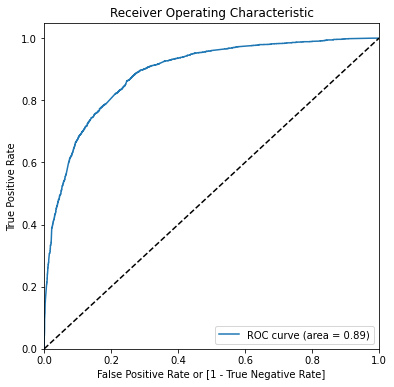

In [88]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Probab, drop_intermediate=False)
#Calling the ROC function
draw_roc(y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Probab)

A good classifier is that the curve must be as close to the boundary as possible. Here, the curve is far from the diagonal line is towards the upper-left corner. The area under the curve of the ROC is 0.89 which is a pretty good value and hence the model at hand looks like a good model.

In [89]:
#Creating columns with different probability cut-offs
numbers=[float(x)/10 for x in range(10)]
for n in numbers:
    y_train_prediction_final[n]= y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > n else 0)
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.356779,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.205398,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.426482,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.839234,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.190019,3934,0,1,1,0,0,0,0,0,0,0,0


In [90]:
#Creating a Dataframe to see the accuracy,sensitivity and specificity for various probability cut-offs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.634354  0.971614  0.426537
0.2   0.2  0.761286  0.914436  0.666917
0.3   0.3  0.792981  0.851987  0.756622
0.4   0.4  0.810297  0.766018  0.837581
0.5   0.5  0.814471  0.692214  0.889805
0.6   0.6  0.806586  0.628143  0.916542
0.7   0.7  0.782158  0.513382  0.947776
0.8   0.8  0.763605  0.432279  0.967766
0.9   0.9  0.711967  0.262774  0.988756


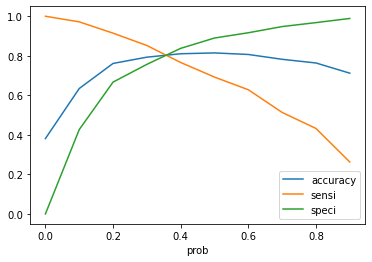

In [91]:
#Plotting cutoffs_df
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The Accuracy, Sensitivity and specificity intersect at 3.7. Hence, at around 0.37,optimal values of the three metrics can be obtained. 

Using 0.37 as the cutoff.

In [92]:
y_train_prediction_final['predicted_final'] = y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.37 else 0)
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final
0,0,0.356779,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.205398,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.426482,3516,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.839234,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.190019,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [93]:
# Checking the overall accuracy
accuracy=metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final)
accuracy

0.8073593073593074

The accuracy value is 0.81 which is a pretty good value

In [94]:
#Creating the confusion matrix again
confusion_2 = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final)
confusion_2

array([[3290,  712],
       [ 534, 1932]], dtype=int64)

In [95]:
#Looking into other metrics

#True Positive (TP)
TP=confusion_2[1,1] 
#True Negatives (TN)
TN=confusion_2[0,0] 
#False Positives (FP)
FP=confusion_2[0,1] 
#False Negatives (FN)
FN=confusion_2[1,0]

In [96]:
#Calculating sensitivity
sensitivity_2=TP/float(TP+FN)
print(sensitivity_2)

0.7834549878345499


The sensitivity value is 0.78

In [97]:
#Calculating specificity
specificity_2=TN/float(TN+FP)
print(specificity_2)

0.8220889555222389


The specificity value is 0.82

In [98]:
#Calculating the False Positive Rate
false_positive_rate_2=FP/float(TN+FP)
print(false_positive_rate_2)

0.17791104447776113


In [99]:
#Calculating the Positive Predictive Value
positive_predictive_value_2=TP/float(TP+FP)
print(positive_predictive_value_2)

0.7307110438729199


In [100]:
#Calculating the Negative Predictive Value
negative_predictive_value_2=TN/float(TN+FN)
print(negative_predictive_value_2)

0.8603556485355649


In [101]:
#Calculating the lead score
y_train_prediction_final['lead_score'] = y_train_prediction_final.Conversion_Probab.map(lambda x: round(x*100))
y_train_prediction_final.head(15)

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final,lead_score
0,0,0.356779,1871,0,1,1,1,1,0,0,0,0,0,0,0,36
1,0,0.205398,6795,0,1,1,1,0,0,0,0,0,0,0,0,21
2,0,0.426482,3516,0,1,1,1,1,1,0,0,0,0,0,1,43
3,0,0.839234,8105,1,1,1,1,1,1,1,1,1,1,0,1,84
4,0,0.190019,3934,0,1,1,0,0,0,0,0,0,0,0,0,19
5,1,0.988239,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.146761,3297,0,1,1,0,0,0,0,0,0,0,0,0,15
7,1,0.984580,8071,1,1,1,1,1,1,1,1,1,1,1,1,98
8,0,0.086196,987,0,1,0,0,0,0,0,0,0,0,0,0,9
9,1,0.933981,7423,1,1,1,1,1,1,1,1,1,1,1,1,93


In [102]:
#Checking conversion rate
check_train = y_train_prediction_final.loc[y_train_prediction_final['Converted']==1,['Converted','predicted_final']]
check_train['predicted_final'].value_counts()

1    1932
0     534
Name: predicted_final, dtype: int64

In [103]:
#Checking the precentage of conversion
1932/float(1932+534)

0.7834549878345499

The conversion rate is 78% which is a significant increase in the conversion rate when compared to the conversion rate of 39% 

# Looking at Precision and Recall

In [104]:
#Getting the precision score
precision=precision_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted)
print(precision)

0.7946927374301676


The precision score is 0.79

In [105]:
#Getting the recall score
recall=recall_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted)
print(recall)

0.6922141119221411


The recall score is 0.69

# Precision - Recall Tradeoff

In [106]:
y_train_prediction_final.Converted, y_train_prediction_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [107]:
p,r,thresholds=precision_recall_curve(y_train_prediction_final.Converted,y_train_prediction_final.Conversion_Probab)

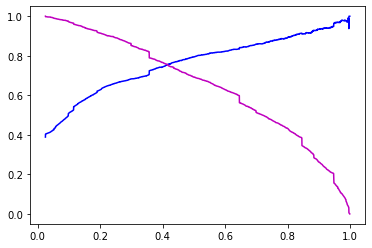

In [108]:
#Plotting the precision and recall trade off
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "m-")
plt.show()

The precision and recall intersects at 0.42.

In [109]:
#Using 0.42 
y_train_prediction_final['predicted_final'] = y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.42 else 0)
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final,lead_score
0,0,0.356779,1871,0,1,1,1,1,0,0,0,0,0,0,0,36
1,0,0.205398,6795,0,1,1,1,0,0,0,0,0,0,0,0,21
2,0,0.426482,3516,0,1,1,1,1,1,0,0,0,0,0,1,43
3,0,0.839234,8105,1,1,1,1,1,1,1,1,1,1,0,1,84
4,0,0.190019,3934,0,1,1,0,0,0,0,0,0,0,0,0,19


In [110]:
#Checking accuracy
print(metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final))

0.8127705627705628


The accuracy value is 0.81 which is a pretty good value

In [111]:
#Confusion Matrix
confusion_3= metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final)
confusion_3

array([[3410,  592],
       [ 619, 1847]], dtype=int64)

In [112]:
#Looking into other metrics

#True Positive (TP)
TP=confusion_3[1,1] 
#True Negatives (TN)
TN=confusion_3[0,0] 
#False Positives (FP)
FP=confusion_3[0,1] 
#False Negatives (FN)
FN=confusion_3[1,0]

In [113]:
#Calculating sensitivity
sensitivity_3=TP/float(TP+FN)
print(sensitivity_3)

0.7489862124898621


The sensitivity value is 0.75

In [114]:
#Calculating specificity
specificity_3=TN/float(TN+FP)
print(specificity_3)

0.8520739630184908


The specificity value is 0.85

In [115]:
#Calculating the False Positive Rate
false_positive_rate_3=FP/float(TN+FP)
print(false_positive_rate_3)

0.14792603698150925


In [116]:
#Calculating the Positive Predictive Value
positive_predictive_value_3=TP/float(TP+FP)
print(positive_predictive_value_3)

0.7572775727757277


In [117]:
#Calculating the Negative Predictive Value
negative_predictive_value_3=TN/float(TN+FN)
print(negative_predictive_value_3)

0.8463638620004964


# 9. PREDICTION ON THE TEST SET

In [118]:
#Scaling the variables in the test set
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [119]:
#Keeping just the variables in the final model
X_test = X_test[final_vars]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_not provided,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Modified,TotalVisits
4269,0.444982,0,0,1,0,0,1,1,0,1,0,0.031873
2376,0.000000,0,1,0,0,0,1,0,0,0,0,0.000000
7766,0.025968,0,0,0,0,0,0,0,1,0,0,0.019920
9199,0.000000,0,0,0,1,1,0,0,0,0,1,0.000000
4359,0.000000,0,1,0,0,0,0,0,0,0,0,0.000000


In [120]:
#Adding constant variable
y_test_prediction= result.predict(sm.add_constant(X_test))

In [121]:
y_prediction_1 = pd.DataFrame(y_test_prediction)
y_test_df = pd.DataFrame(y_test)
y_prediction_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_prediction_final = pd.concat([y_test_df, y_prediction_1],axis=1)
y_prediction_final.head()

,Converted,0
0,1,0.464383
1,1,0.947280
2,1,0.754495
3,0,0.097796
4,1,0.845556


In [122]:
y_prediction_final= y_prediction_final.rename(columns = {0 : 'Conversion_Probab'})
y_prediction_final.head()

,Converted,Conversion_Probab
0,1,0.464383
1,1,0.947280
2,1,0.754495
3,0,0.097796
4,1,0.845556


In [123]:
#Make predictions on the test set using 0.42 as the cutoff
y_prediction_final['predicted_final'] = y_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.42 else 0)

In [124]:
#Calculating the lead score
y_prediction_final['lead_score'] = y_prediction_final.Conversion_Probab.map(lambda x: round(x*100))
y_prediction_final.head(15)

,Converted,Conversion_Probab,predicted_final,lead_score
0,1,0.464383,1,46
1,1,0.947280,1,95
2,1,0.754495,1,75
3,0,0.097796,0,10
4,1,0.845556,1,85
5,1,0.610791,1,61
6,1,0.509044,1,51
7,1,0.251105,0,25
8,0,0.047400,0,5
9,1,0.379611,0,38


In [125]:
check_test = y_prediction_final.loc[y_prediction_final['Converted']==1,['Converted','predicted_final']]
check_test['predicted_final'].value_counts()

1    817
0    278
Name: predicted_final, dtype: int64

In [126]:
817/float(817+278)

0.7461187214611872

Conversion rate on test set is 75%.

In [127]:
#Accuracy
print(metrics.accuracy_score(y_prediction_final['Converted'], y_prediction_final.predicted_final))

0.8145743145743146


The accuracy value on the test set is 0.81 which is a good value.

In [128]:
#Confusion Matrix
confusion_4 = metrics.confusion_matrix(y_prediction_final['Converted'], y_prediction_final.predicted_final)
confusion_4

array([[1441,  236],
       [ 278,  817]], dtype=int64)

In [129]:
#Looking into other metrics

#True Positive (TP)
TP=confusion_4[1,1] 
#True Negatives (TN)
TN=confusion_4[0,0] 
#False Positives (FP)
FP=confusion_4[0,1] 
#False Negatives (FN)
FN=confusion_4[1,0]

In [130]:
#Calculating sensitivity
sensitivity_4=TP/float(TP+FN)
print(sensitivity_4)

0.7461187214611872


The sensitivity value is 0.75

In [131]:
#Calculating specificity
specificity_4=TN/float(TN+FP)
print(specificity_4)

0.8592725104353012


The specificity value is 0.86

In [132]:
#Calculating the False Positive Rate
false_positive_rate_4=FP/float(TN+FP)
print(false_positive_rate_4)

0.14072748956469885


In [133]:
#Calculating the Positive Predictive Value
positive_predictive_value_4=TP/float(TP+FP)
print(positive_predictive_value_4)

0.7758784425451092


In [134]:
#Calculating the Negative Predictive Value
negative_predictive_value_4=TN/float(TN+FN)
print(negative_predictive_value_4)

0.8382780686445608


The choice of cut-off has worked out well as the sensitivity and specificty has worked out well on the test set.

**Precision and Recall on the test data**

In [135]:
precision_test=precision_score(y_prediction_final.Converted, y_prediction_final.predicted_final)
precision_test

0.7758784425451092

The precision score is 0.78

In [136]:
recall_test=recall_score(y_prediction_final.Converted, y_prediction_final.predicted_final)
recall_test

0.7461187214611872

The recall score is 0.75

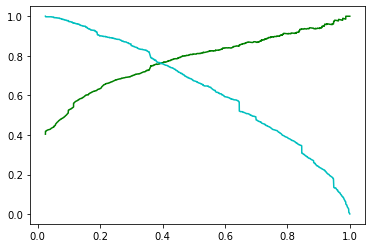

In [137]:
p,r,thresholds=precision_recall_curve(y_prediction_final.Converted, y_prediction_final.Conversion_Probab)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "c-")
plt.show()

The precision and recall intersects at 0.4

**CONCLUSION**

The Accuracy, Sensitivity and Specificity values of the test set are around 81%, 75% and 86% which are approximately close to the values obatined from the train set implying that the model is good. 

-- The variable total time spent on the website has the highest coefficient value implying that it has the highest positive influence on whether the lead will be converted or not. 

-- The variable TotalVisits has the 2nd highest coefficent value implying that this variable also has a high positive influence on whether the lead will be converted or not. 

-- Leads originating from add form also has a high positive impact on whether the lead will be converted or not.

-- Working professionals seem to have a high positve impact on whether a particular lead converts. 

-- Cases wherein the last activity is SMS sent also has a positive impact on  whether a particular lead converts. 

-- The lead source being Olark Chat also has a positive impact on  whether a particular lead converts. 

--Variables that have a negative impact on whether a lead will be converted or not are the leads originating from landing page submission, direct traffic, last activity being Olark Chat Conversation, specialisations and occupations that are not provided and the last notable activity that is modified. 


Since the conversion rate is 78% on the train test and 75% on the test set which is a signficant increase in the rate of conversion as compared to the conversion rate of 39%, the company X Education can look into the impact that these variables have on the conversion of leads and work towards improving the conversion rate accordingly.